# K Nearest Neighbour

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', None)

## Importing data

In [2]:
data = pd.read_csv('../data/6_train_dataset_augmented.csv')

In [3]:
test = pd.read_csv('../data/4_test_dataset.csv')

## KNN

Getting X & y

In [4]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

Initialise base KNN instance

In [4]:
knn= KNeighborsClassifier()

Initialise parameter grid for grid search

In [5]:
parameter_grid = {"n_neighbors": range(1,21), 
                  "weights": ['uniform', 'distance'], 
                  "p": [1, 2]}

Run grid search on KNN

In [6]:
gs = GridSearchCV(estimator= knn,
                  param_grid= parameter_grid,
                  scoring= "recall",
                  verbose= 4)

In [7]:
gs.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=0.551 total time=   6.0s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=0.633 total time=   4.8s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=0.647 total time=   5.2s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=0.639 total time=   6.0s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.638 total time=   6.9s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=0.551 total time=   5.3s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=0.633 total time=   4.8s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=0.647 total time=   5.6s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=0.639 total time=   5.2s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.638 total time=   4.7s
[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, score=0.535 total time=   2.7s
[CV 2/5] END n_neighbors=1, p=2, weights=uniform;, score=0.611 total time=   2.2s
[CV 3/5] EN

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=4)

Get results from grid search

In [8]:
print(f'Best hyper-parameters are: {gs.best_params_}\nRecall is: {round(gs.best_score_ * 100, 2)}%')

Best hyper-parameters are: {'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
Recall is: 73.9%


## Ideal model

Initialising KNN with ideal hyper-parameters

In [5]:
knn_ideal = KNeighborsClassifier(n_neighbors=19, p=1, weights='uniform')

Training and getting predictions

In [6]:
X_train, y_train = X, y
X_test, y_test = X_test, y_test

In [7]:
model = knn_ideal.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

Getting results

In [8]:
acc_result = accuracy_score(y_test, y_test_pred)
recall_result = recall_score(y_test, y_test_pred)
precision_result = precision_score(y_test, y_test_pred)
f1_result = f1_score(y_test, y_test_pred)
print(f'Accuracy score is : {round(acc_result*100, 2)}%')
print(f'Recall score is : {round(recall_result*100, 2)}%')
print(f'Precision score is : {round(precision_result*100, 2)}%')
print(f'F1 score is : {round(f1_result*100, 2)}%')

Accuracy score is : 86.05%
Recall score is : 73.62%
Precision score is : 66.88%
F1 score is : 70.09%


## Feature Importance

Permutation Importance

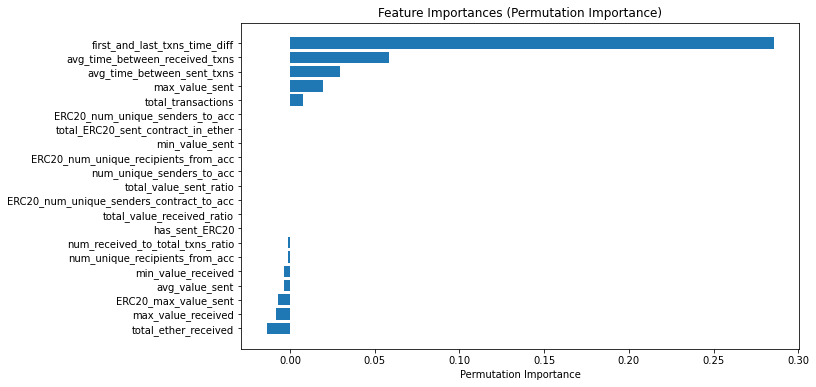

In [9]:
r = permutation_importance(knn_ideal, X_test, y_test, scoring = 'recall',
                           n_repeats=1,
                           random_state=0)
# Get feature importances and their names
feature_importances = r.importances_mean
feature_names = X_test.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = np.array(feature_names)[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances[::-1], align="center")
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names[::-1])
plt.xlabel("Permutation Importance")
plt.title("Feature Importances (Permutation Importance)")
plt.show()